In [16]:
#1.Как распределяются цены на жильё?
#2.Как цена зависит от типа жилья?
#3.Какие районы самые дорогие,а какие самые дешевые?
#4.Как соотносятся активность и цена / популярность жилья?
#5.Как влияют доступность и минимальное число ночей  на цену и тип жилья?
# 0. Импорт библиотек и настройки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12


In [2]:
# 1. Загрузка данных
file_path = r"C:\Users\User\Downloads\airbnb_data\AB_NYC_2019.csv"  

df = pd.read_csv(file_path)
print("✅ Датасет загружен — shape:", df.shape)
df.info()
print("\nПропуски по столбцам:\n", df.isnull().sum())
df.head()


✅ Датасет загружен — shape: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# 2. Предварительная очистка / предобработка

# 2.1 Заполнить пропуски в reviews_per_month
if 'reviews_per_month' in df.columns:
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# 2.2 Удаление дубликатов
print("Дубликатов до:", df.duplicated().sum())
df = df.drop_duplicates()
print("Дубликатов после:", df.duplicated().sum())

# 2.3 Фильтрация
df = df[(df['price'] > 0) & (df['price'] < 1000)]  
print("После фильтрации по цене — shape:", df.shape)


Дубликатов до: 0
Дубликатов после: 0
После фильтрации по цене — shape: (48586, 16)


In [4]:
# 3. Быстрый статистический обзор
display(df.describe(include='all'))


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.858600e+04,48570,4.858600e+04,48565,48586,48586,48586.000000,48586.000000,48586,48586.000000,48586.000000,48586.000000,38696,48586.000000,48586.000000,48586.000000
unique,NaN,47601,NaN,11404,5,221,NaN,NaN,3,NaN,NaN,NaN,1762,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,415,21447,3907,NaN,NaN,25164,NaN,NaN,NaN,1411,NaN,NaN,NaN
mean,1.902135e+07,NaN,6.763733e+07,NaN,NaN,NaN,40.728927,-73.952031,NaN,140.269049,6.974931,23.372803,NaN,1.095313,7.168670,112.365928
std,1.097890e+07,NaN,7.860718e+07,NaN,NaN,NaN,0.054580,0.046156,NaN,112.899316,20.276877,44.651661,NaN,1.599884,33.046098,131.383634
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,10.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000
25%,9.476410e+06,NaN,7.831209e+06,NaN,NaN,NaN,40.690002,-73.982950,NaN,69.000000,1.000000,1.000000,NaN,0.040000,1.000000,0.000000
50%,1.967620e+07,NaN,3.084879e+07,NaN,NaN,NaN,40.722960,-73.955580,NaN,105.000000,3.000000,5.000000,NaN,0.380000,1.000000,44.000000
75%,2.914903e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763130,-73.936100,NaN,175.000000,5.000000,24.000000,NaN,1.600000,2.000000,225.000000


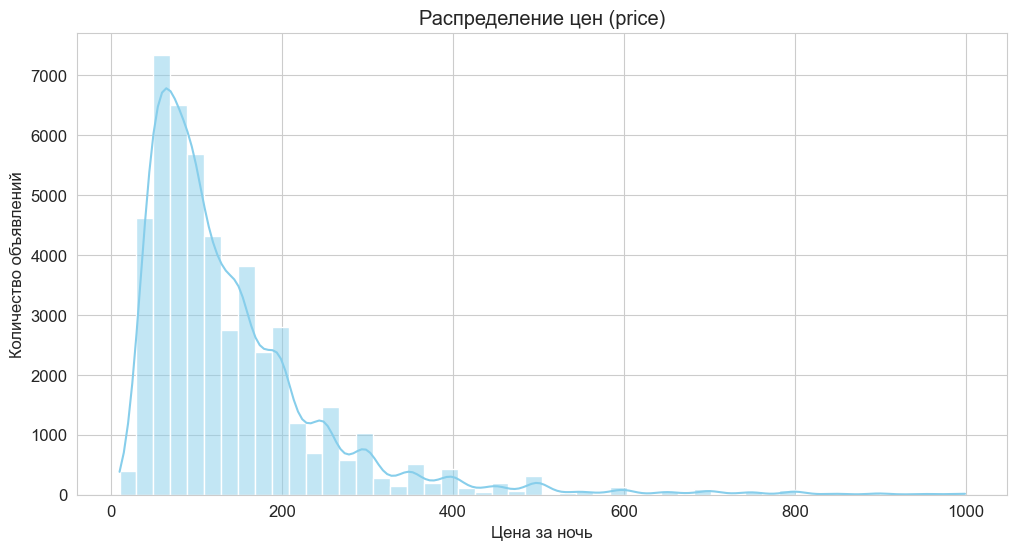

In [5]:
# 4.1 Гистограмма распределения цен
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title("Распределение цен (price)")
plt.xlabel("Цена за ночь")
plt.ylabel("Количество объявлений")
plt.show()

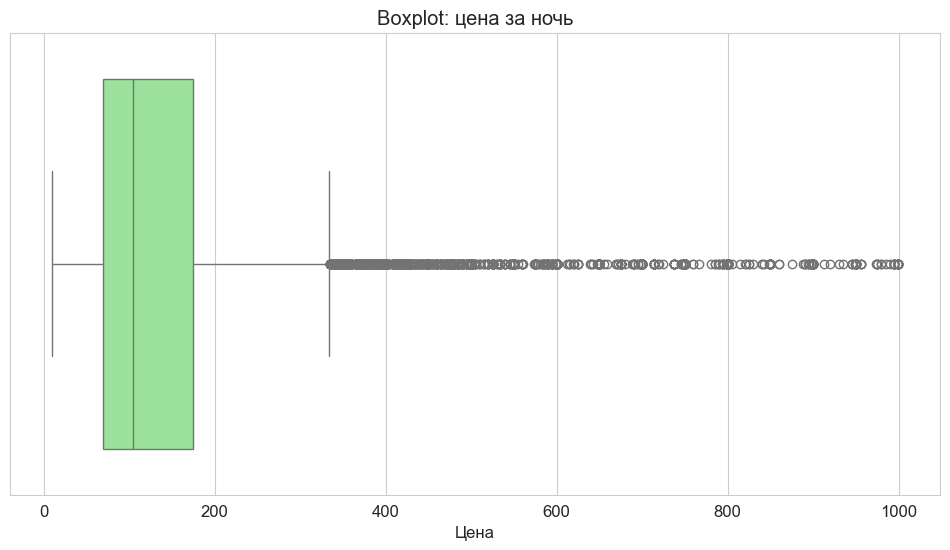

In [6]:
# 4.2 Boxplot — разброс цен
sns.boxplot(x=df['price'], color='lightgreen')
plt.title("Boxplot: цена за ночь")
plt.xlabel("Цена")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_25044\1241016262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df, palette='Set2')


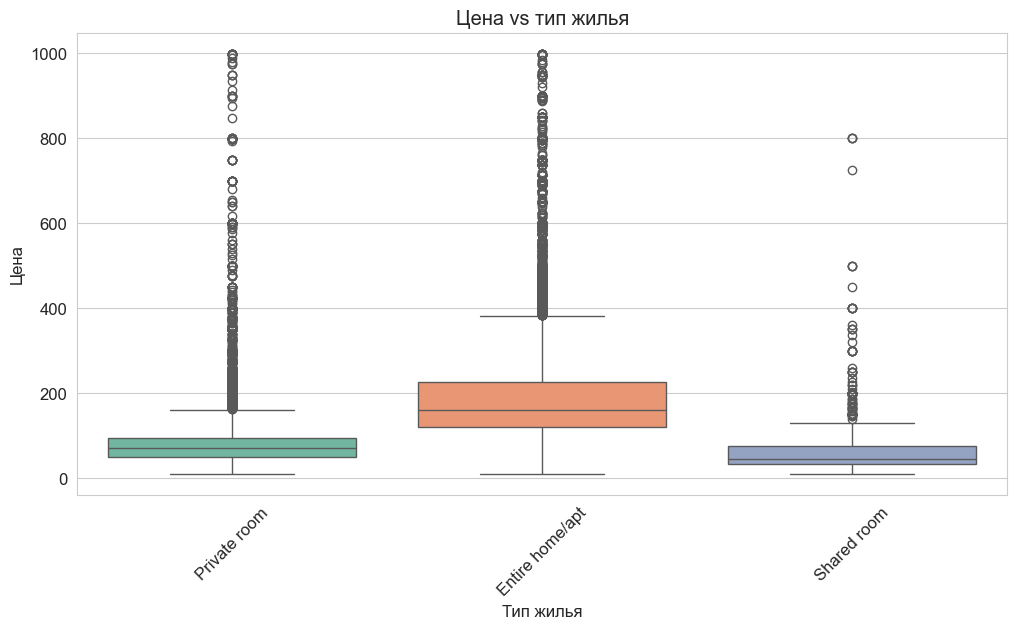

In [7]:
# 4.3 Boxplot: цена vs тип жилья (room_type)
sns.boxplot(x='room_type', y='price', data=df, palette='Set2')
plt.title("Цена vs тип жилья")
plt.xlabel("Тип жилья")
plt.ylabel("Цена")
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25044\677006966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean, palette='viridis')


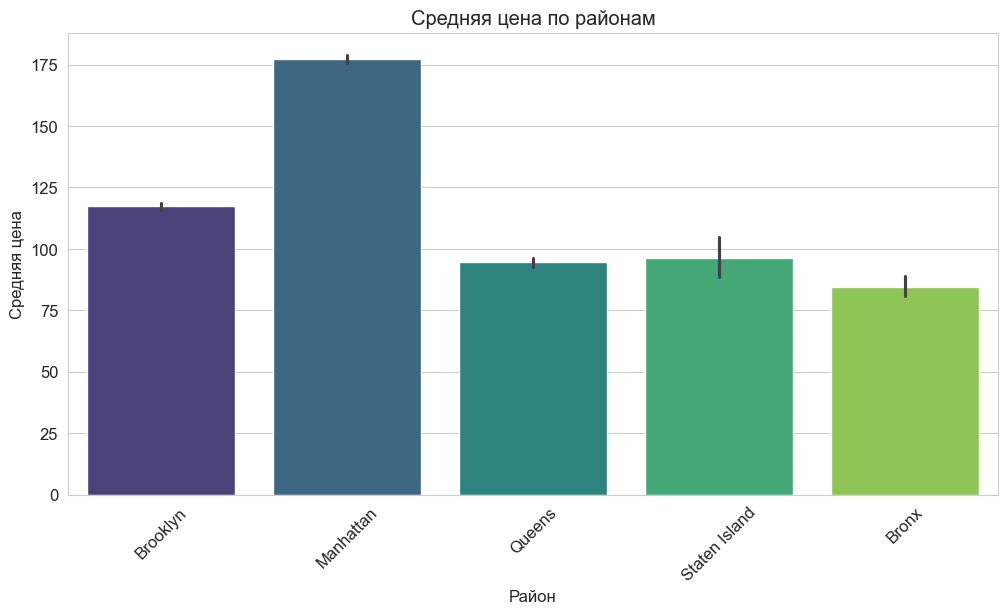

In [8]:
# 4.4 Bar‑plot: средняя цена по районам (neighbourhood_group)
sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean, palette='viridis')
plt.title("Средняя цена по районам")
plt.xlabel("Район")
plt.ylabel("Средняя цена")
plt.xticks(rotation=45)
plt.show()

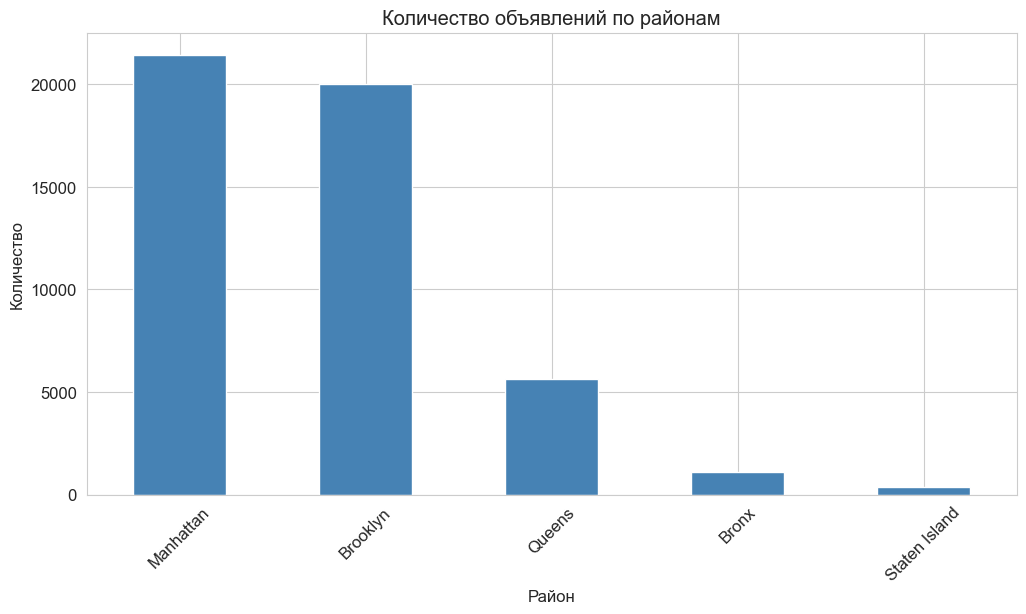

In [9]:
# 4.5 Количество объявлений по районам
df['neighbourhood_group'].value_counts().plot(kind='bar', color='steelblue')
plt.title("Количество объявлений по районам")
plt.xlabel("Район")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.show()

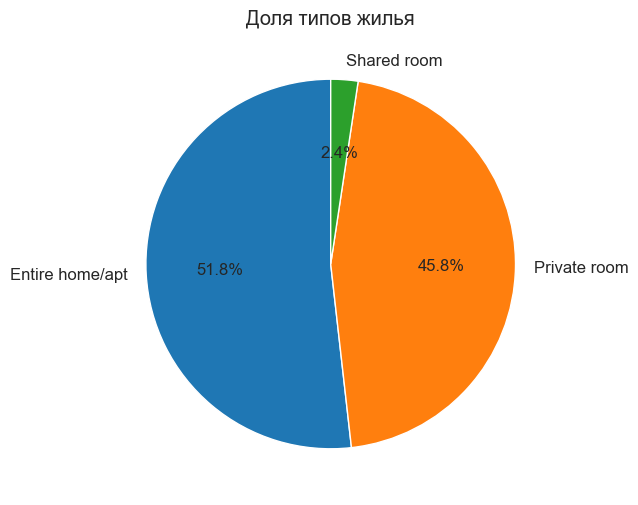

In [10]:
# 4.6 Распределение типов жилья — pie chart
df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Доля типов жилья")
plt.ylabel("")
plt.show()

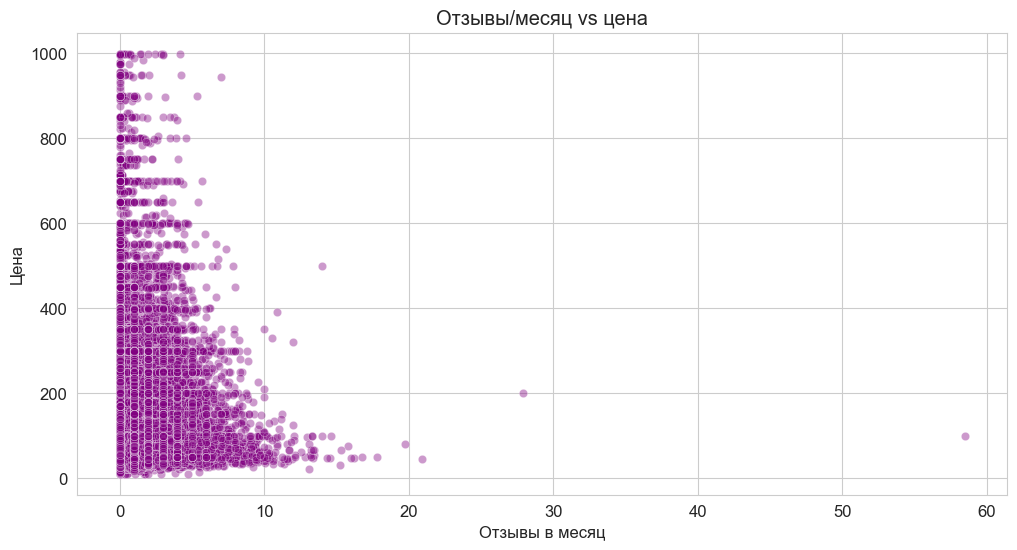

In [11]:
# 4.7 Scatter: цена vs отзывы в месяц (reviews_per_month)
sns.scatterplot(x='reviews_per_month', y='price', data=df, alpha=0.4, color='purple')
plt.title("Отзывы/месяц vs цена")
plt.xlabel("Отзывы в месяц")
plt.ylabel("Цена")
plt.show()

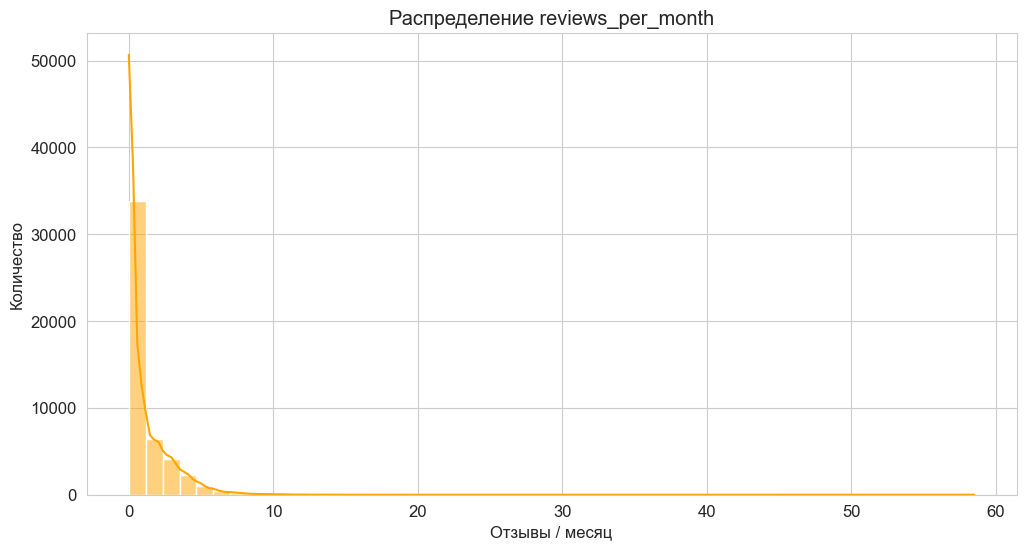

In [12]:
# 4.8 Гистограмма распределения отзывов в месяц
sns.histplot(df['reviews_per_month'], bins=50, kde=True, color='orange')
plt.title("Распределение reviews_per_month")
plt.xlabel("Отзывы / месяц")
plt.ylabel("Количество")
plt.show()

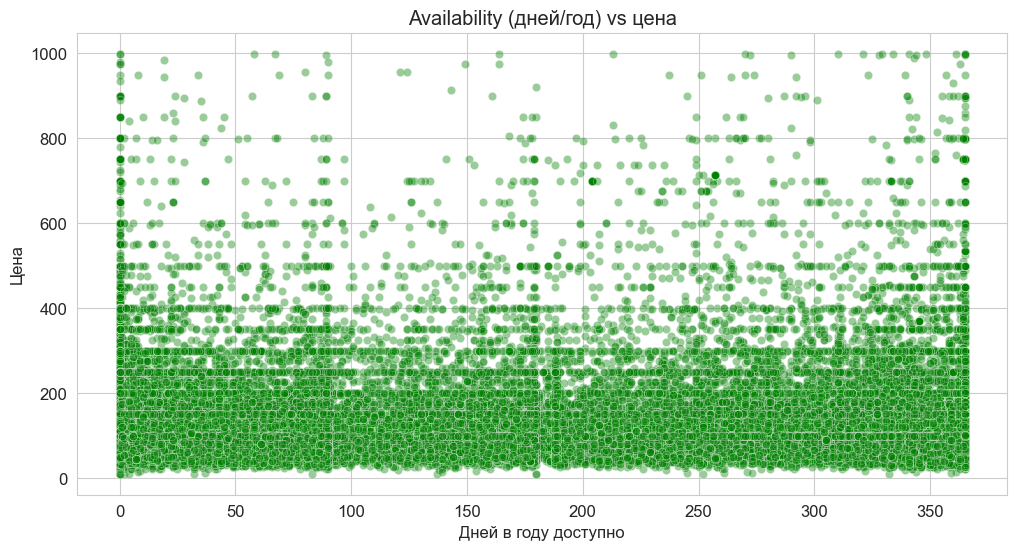

In [13]:
# 4.9 Scatter: цена vs доступность (availability_365), если столбец есть
if 'availability_365' in df.columns:
    sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.4, color='green')
    plt.title("Availability (дней/год) vs цена")
    plt.xlabel("Дней в году доступно")
    plt.ylabel("Цена")
    plt.show()

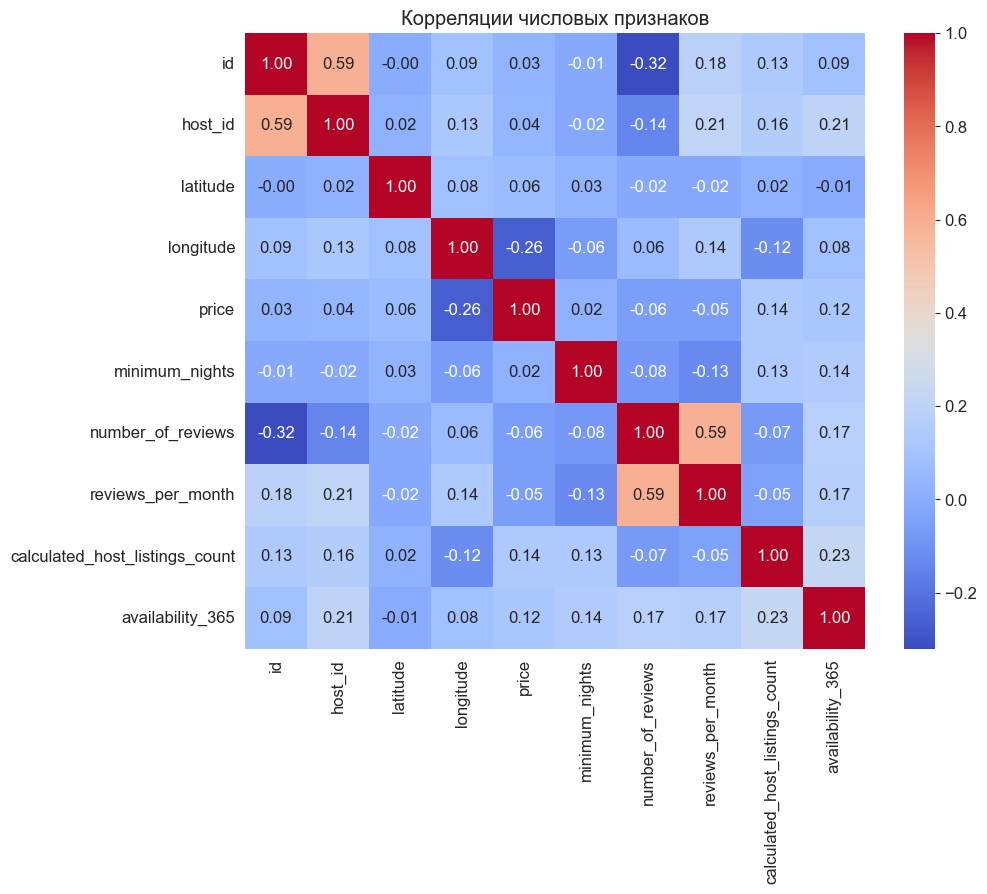

In [14]:
# 4.10 Корреляционная матрица для числовых признаков
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляции числовых признаков")
plt.show()